# Part 1 - Problem Statement and Reddit Scraping

## Introduction

In this connected, globalised age, information is easily spread via numerous channels. One medium that has gained popularity as a news source in the past decade is social media. Social media platforms such as Facebook, Twitter, Instagram etc are now the preferred news source for numerous people across the globe. In the United States alone, social media has outpaced the traditional newspaper as a news source, with 20% of adults in the United States in 2018 said they get their news from social media "often," compared to 16% who said they often get news from print newspapers.<sup>1</sup><br>

### Fake News

Unfortunately, such ease of access to news via social media has given rise to the prevelance of fake news. Fake news is simply false or misleading information presented as news.

Fake news in it's most inoccent form can usually be brushed off as a prank. However, fake news is often used for more malicious purposes, such as creating political agendas, causing panic, and in recent years, generating anti-vaccine sentiment. One prominent case of fake news causing serious harm was when an elderly woman landed in intensive care for injecting ivermectin, as she was led to believe that vaccines were evil and useless against COVID, and that the ivermectin would protect her from the virus.<sup>2</sup>

No matter how educated or knowledgeble one claims to be, there is no denying that some form of misinformation has infiltrated our daily lives at some point.
People fall for fake news for two main reasons:
1. It supports certain biasesness or viewpoints that an individual may already possess.
2. Little to zero knowledge of the topic, causing them to take the fake news at face value.
3. **It is worded and written like real news, with choice words used to provide an air of credibility to the fake news.**

Of the 3 reasons stated above, the first and second one can be rectifed by proper education and guidance. It is the third reason that is a bit more tricky, as a cleverly written fake news piece can fool even the most discerning of individuals, not to mention the lowly educated or elderly.

Hence, in this project, we will aim to develop a robust model that is discerning enough to weed out the fake news from real news using their individual texts.<br>

But first, in order to build a model, we will first need data.

### Reddit is a good source of data

Reddit is an American social news aggregation, web content rating, and discussion website. It is a good source of data for the model as there is a vast amount of topics being discussed, in forums called 'subreddits'.

All we have to do now is look for the appropriate subreddits for us to extract data for our datasets.

### The Onion

<img src="../Images/TheOnion.png" width="150" align="center"/>

The Onion is an American digital media company and newspaper organization that publishes satirical articles on vairous news topics. These articles are often references real world figures or events, but places the subjects in completely imaginary, and often ridiculous or hilarious scenarios.

<img src="../Images/OnionHeadline.png" width="400" align="center"/>

Since The Onion often references real world figures or events in fake news articles, TheOnion subreddit https://www.reddit.com/r/TheOnion/ will serve as the source of our fake news dataset.

We will now have to find a source of real news that is the opposite of The Onion.

### Not The Onion

<img src="../Images/NotTheOnion.png" width="150" align="center"/>

As it's name suggests, the subreddit called **nottheonion** is not The Onion. However, it contains *'true stories that are so mind-blowingly ridiculous that you could have sworn they were from The Onion'*.

<img src="../Images/nottheonionheadline.png" width="400" align="center"/>

Since nottheonion subreddit https://www.reddit.com/r/nottheonion/ is real news of hilarious or ridiculous nature, it is the perfect subreddit of which we will extract our real news dataset.

### The Classification Model

As we are seperating the fake news from the real news, this will be **classification problem**. There are a variety of models we can use for such classification problems, such as Random Forest Classifier, Multinomial Naive Bayes, Logistics Regression etc.

### How is sucess determined?

Success will be determined by how well the model predicts whether news is fake or real. This can be easily determined by the proportion of false positives and false negatives. Low number of these false positives or negatives, ie 'minimizing', would indicate a more successful model.
<br>
<br>

#### We can now craft our problem statement!

## Problem Statement

Fake news is a prevalent and harmful problem in our modern society, often misleading the general public on important topics such as healthcare and defense. This can lead to long standing societal issues which are a detriment to nations worldwide.<br>

In view of this menace, our team aims to develop a classification model that is discerning enough to separate fake news from real news, based on the headline alone. This model must be simple to use, and also minimize false positives and false negatives, so that the users of this model, which include government bodies such as the police, and even regular citizens, can weed out the fake news easily, thus creating a secure, and more misinformation-resilient society.

## Scraping the subreddits

In [81]:
# import libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url_submission = 'https://api.pushshift.io/reddit/search/submission'

In [12]:
# define a reddit scrape function
def reddit_scrape(url, subreddit, utc, number): # number is the number of posts to pull
    params = {
        'subreddit': subreddit,
        'size': 100,
        'before': utc
    }
    res = requests.get(url, params)
    data = res.json()
    posts = data['data']
    df = pd.DataFrame(posts)
    df.drop_duplicates(subset = ['title'], keep = 'last', inplace = True) # get rid of the pesky duplicates!
    while len(df) <= number:
        params_2 = {
            'subreddit': subreddit,
            'size': 100,
            'before': df.created_utc.iloc[-1] # we would like the next 100 posts to be from before the latest post in the current dataframe
        }
        res_2 = requests.get(url, params_2)
        data_2 = res_2.json()
        posts_2 = data_2['data']
        df = pd.concat([df, pd.DataFrame(posts_2)], axis=0) # combining the dataframes
        df.drop_duplicates(subset = ['title'], keep = 'last', inplace = True) # get rid of the pesky duplicates!
    df.reset_index(drop=True, inplace=True) # finally reset the index
    return df

Pick a date and time, where all other posts will be before this datetime:
<br>
**Chosen DateTime(GMT) = Saturday, 1 January 2022 00:00:00 GMT+08:00
<br>
UTC equivalent = 1640966400**

Why is this UTC chosen? No other reason except that it is New Year's Day 2022!

For the datasets, I target 5,000 from each dataset. To ensure that there are at **least 5,000 points** after cleaning the data, I will **scrape 5,300 from both TheOnion and nottheonion subreddits so as to create some 'buffer'**.

In [4]:
# pull 5300 from the onion
# UTC = 1640966400
onion = reddit_scrape(url=url_submission, subreddit='TheOnion', utc=1640966400, number=5300)
print(onion.shape)
onion.head()

(5336, 83)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,media_metadata,author_flair_background_color,author_flair_text_color,author_cakeday,steward_reports,removed_by,updated_utc,og_description,og_title,gilded
0,[],False,dwaxe,None,[],None,text,t2_3jamc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,dwaxe,None,[],None,text,t2_3jamc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,dwaxe,None,[],None,text,t2_3jamc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,dwaxe,None,[],None,text,t2_3jamc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,dwaxe,None,[],None,text,t2_3jamc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# double check for duplicates
onion.drop_duplicates(subset = ['title'], keep = 'last', inplace = True)
print(onion.shape)

(5336, 83)


In [7]:
# check for duplicates in onion dataset, just in case
onion.drop_duplicates(subset = ['title'], keep = 'last', inplace = True)
print(onion.shape)

(5336, 83)


No duplicate titles are present in my onion dataset!

In [8]:
# save the onion dataset
onion.to_csv('../datasets/onion_reddit.csv', index=False)

In [9]:
# pull 5300 from nottheonion
# UTC = 1640966400
not_onion = reddit_scrape(url=url_submission, subreddit='nottheonion', utc=1640966400, number=5300)
print(not_onion.shape)
not_onion.head()

(5311, 77)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color,author_cakeday,link_flair_css_class,link_flair_text,link_flair_template_id
0,[],False,suchdogewow5,None,[],None,text,t2_10bvyc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,merepsull,None,[],None,text,t2_36x70urt,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,DaveInLondon89,None,[],None,text,t2_8dudsu19,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,av1987,None,[],None,text,t2_1797ih,False,False,...,"{'oembed': {'author_name': 'Mohammad Ghazali',...","{'content': '&lt;blockquote class=""twitter-vid...","{'oembed': {'author_name': 'Mohammad Ghazali',...","{'content': '&lt;blockquote class=""twitter-vid...",NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Acrzyguy,None,[],None,text,t2_24t4nd3s,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# check for duplicates in not_onion dataset, just in case
not_onion.drop_duplicates(subset = ['title'], keep = 'last', inplace = True)
print(not_onion.shape)

(5311, 77)


No duplicate titles are present in my not_onion dataset!

In [11]:
# save not_onion dataset
not_onion.to_csv('../datasets/not_onion_reddit.csv', index=False)

## What are the earliest dates (created_utc) for both datasets?

In [108]:
onion.created_utc.sort_values(ascending=True).head(1)

5335    1543606167
Name: created_utc, dtype: int64

For TheOnion, the earliest date is UTC is 1543606167, which is Saturday, 1 December 2018 03:29:27 GMT+08:00.

In [109]:
not_onion.created_utc.sort_values(ascending=True).head(1)

5310    1637072262
Name: created_utc, dtype: int64

For nottheonion, the earliest date is UTC, which is Tuesday, 16 November 2021 22:17:42 GMT+08:00.<br>
The earliest date for nottheonion dataset is nearly 3 years apart from TheOnion dataset!

A visual representation of the UTCs:

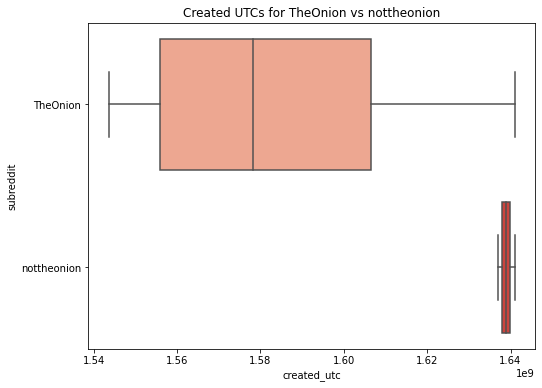

In [114]:
plt.figure(figsize=(8, 6))
plt.title('Created UTCs for TheOnion vs nottheonion')
sns.boxplot(data=pd.concat([onion, not_onion],axis=0), y='subreddit', x='created_utc', palette='Reds');

The range of data for nottheonion is only from a very small span of time, while that of TheOnion spans a significantly longer period of time. This shows that there is a greater number of posts for nottheonion.<br>
This is not good, as the hot topics for news can change very quickly, and thus our dataset is not a fair comparison of real news and their fake news counterparts.

We will need a better way to scrape data from the nottheonion dataset.

In [89]:
import random # to generate random integer in the function below

In [103]:
# define a new reddit scrape function
def reddit_scrape_2(url, subreddit, utc_start, utc_end, number, save_to): # number is the number of posts to pull
    params = {
        'subreddit': subreddit,
        'size': 1, # get the first post
        'before': utc_end
    }
    res = requests.get(url, params)
    data = res.json()
    posts = data['data']
    df = pd.DataFrame(posts)
    df.drop_duplicates(subset = ['title'], keep = 'last', inplace = True) # get rid of the pesky duplicates!
    while len(df) <= (number-1):
        params_2 = {
            'subreddit': subreddit,
            'size': 50, # scrape posts in blocks of 50
            'before': random.randint(utc_start, utc_end) # randomly pick a utc between 2 UTCs
        }
        res_2 = requests.get(url, params_2)
        data_2 = res_2.json()
        posts_2 = data_2['data']
        df = pd.concat([df, pd.DataFrame(posts_2)], axis=0) # combining the dataframes
        df.drop_duplicates(subset = ['title'], keep = 'last', inplace = True) # get rid of the pesky duplicates!
        df.to_csv(save_to)
    df.reset_index(drop=True, inplace=True) # finally reset the index
    return df

We will scrape data from between:
- 1640966400, Saturday, 1 January 2022 00:00:00 GMT+08:00, and
- 1543606167, Saturday, 1 December 2018 03:29:27 GMT+08:00, which is the earliest recorded UTC for TheOion dataset.

In [104]:
not_onion_2 = reddit_scrape_2(url=url_submission, subreddit='nottheonion', utc_start=1543606167, 
                              utc_end=1640966400, number=5300, save_to='../Datasets/not_onion_2_reddit.csv')
print(not_onion_2.shape)
not_onion_2.head()

(5340, 82)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,media_embed,secure_media,secure_media_embed,steward_reports,link_flair_css_class,link_flair_text,link_flair_template_id,og_description,og_title,removed_by
0,[],False,suchdogewow5,None,[],None,text,t2_10bvyc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,VonDrakken,None,[],None,text,t2_74dkel,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,GuilhermeVillas,None,[],None,text,t2_1g7phpq,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Chubbbsss,None,[],None,text,t2_jw4xf,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,racconslayer101,None,[],None,text,t2_1485uo,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
not_onion_2.shape

(5340, 82)

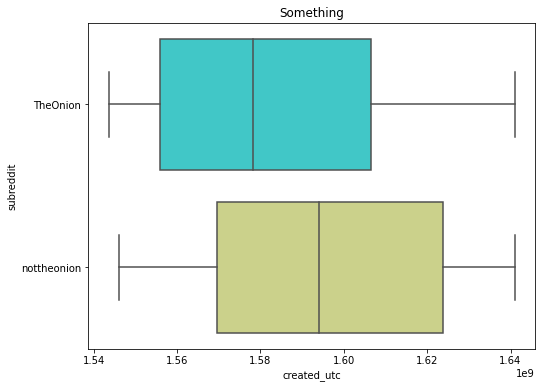

In [115]:
plt.figure(figsize=(8, 6))
plt.title('UTCs after re-scraping nottheonion dataset')
sns.boxplot(data=pd.concat([onion, not_onion_2], axis=0), y='subreddit', x='created_utc', palette='rainbow');

We can see that the UTC's are much more balanced now, meaning our dataset is a more fair representation of a fake news vs real news dataset.

We are now ready to perform EDA in the next codebook!

# References
1. https://www.pewresearch.org/fact-tank/2018/12/10/social-media-outpaces-print-newspapers-in-the-u-s-as-a-news-source/
2. https://www.straitstimes.com/singapore/grandmother-hospitalised-after-taking-ivermectin-to-protect-herself-against-covid-19